<a href="https://colab.research.google.com/github/KhushiChaudhary03/Ted_Talk_Views_Prediction/blob/main/Ted_Talk_View_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **TED TALK VIEWS PREDICTION**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
#####  **Khushi**


# **Project Summary -**

The TED Talk View Prediction project aims to forecast the popularity of TED Talks based on metadata using machine learning algorithms. TED Talks are widely viewed and appreciated for sharing insightful ideas across technology, education, and design. However, not all talks receive the same attention. Some go viral, while others attract only moderate viewership. This disparity inspired an analytical approach to understanding which features influence view counts and how well they can be predicted using data-driven models.

The dataset contained 4,005 TED Talks, each described by multiple variables such as the event name, number of comments, duration, native and available languages, recording and publishing dates, topics, and a categorized view group. The target variable was log_views, the logarithmic transformation of the original view count, chosen to reduce skewness and normalize the data for regression models. To better understand the role of other potentially skewed variables, similar log transformations were applied to comments and duration, producing new features like log_comments and log_duration.

Data preprocessing was a crucial step in the workflow. Categorical variables such as event, topics, native_lang, available_lang, and view_group were converted into numeric format using one-hot encoding. Additionally, features like available_lang were transformed into a count of available languages to add numerical significance. Date columns were separated into day, month, and year to better capture temporal patterns. Features that provided little variance or meaning, such as native_lang_full, were dropped. The dataset was then split into training and testing sets using an 80:20 ratio.

Multiple regression models were evaluated for this task. These included Lasso Regression, Ridge Regression and Random Forest. Tree-based model Random Forest outperformed linear models in terms of predictive power.

To mitigate overfitting and optimize performance, hyperparameter tuning was conducted using GridSearchCV. For Random Forest, parameters such as n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features were optimized.

Evaluation metrics used across all models included Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R², and Adjusted R². These metrics provided a comprehensive understanding of how well the models captured the variance in viewership. Additionally, actual vs. predicted value plots were created to visually assess model accuracy.

Feature importance analysis revealed that variables like duration, comments, and available_lang_count had strong influence on view counts.


In summary, the project demonstrated how machine learning can effectively predict the popularity of online content like TED Talks. With robust preprocessing, model selection, and hyperparameter tuning, models like XGBoost and Random Forest provide valuable insights and strong performance. This project lays the foundation for future work involving text analysis, speaker profiles, or sentiment analysis to further enhance predictive power.

# **GitHub Link -**

https://github.com/KhushiChaudhary03/Ted_Talk_Views_Prediction

# **Problem Statement**


**The objective of this project is to build a predictive model that estimates the number of views a TED Talk video will receive. By analyzing various features such as the talk's title, speaker name, duration, publication year, number of available subtitle languages, and tags, the goal is to understand what factors contribute most to a video's popularity and use this insight to make accurate predictions. This can help content creators, marketers, and the TED team optimize their content strategy and improve audience engagement.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
import ast

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,4
occupations,522
about_speakers,503
views,0
recorded_date,1
published_date,0
event,0


<Axes: >

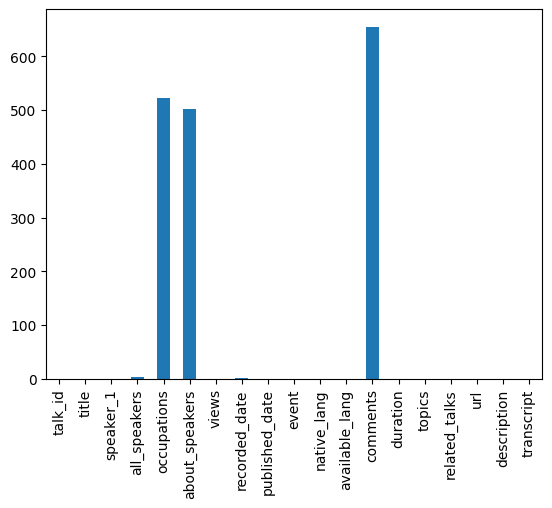

In [ ]:
# Visualizing the missing values
#bar graph of missing values
df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

There are 4005 rows and 19 columns.
#### The number of missing values in this dataset are:


*   all_speakers - 4
*   occupations - 522
*   about_speakers - 503
*   recorded_date - 1
*   comments - 655



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description

talk_id :  Unique identifier for each TED Talk


title : The title of the TED Talk

speaker_1 : Name of the primary speaker of the TED Talk

all_speakers : Names of all speakers involved (if more than one)

occupations : Occupations or professional titles of the speaker(s)

about_speakers : Short biographical description or background about the speaker(s).

views : Number of views the talk received on the TED platform

recorded_date : The date when the talk was recorded (not always the same as the publication date)

published_date : The date when the talk was published on the TED website

event : The TED event at which the talk was given

native_lang : The original language in which the talk was delivered

available_lang : Languages available for subtitles/translations

comments : Number of comments posted on the TED talk

duration : Duration of the talk in seconds

topics : Topics or tags assigned to the talk

related_talks : Information about talks related to this one

url : Direct URL to the TED talk page

description : A short summary or abstract of the talk provided by TED

transcript : Full transcript of the talk

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
talk_id,4005
title,4005
speaker_1,3274
all_speakers,3306
occupations,2049
about_speakers,2977
views,3996
recorded_date,1334
published_date,2962
event,459


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Converting recorded_date and published_date into date-time
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_date'] = pd.to_datetime(df['published_date'])
# Extract components from recorded_date
df['recorded_year'] = df['recorded_date'].dt.year
df['recorded_month'] = df['recorded_date'].dt.month
df['recorded_day'] = df['recorded_date'].dt.day

# Extract components from published_date
df['published_year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_day'] = df['published_date'].dt.day


In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'recorded_year',
       'recorded_month', 'recorded_day', 'published_year', 'published_month',
       'published_day'],
      dtype='object')

In [ ]:
# Handling missing values

# 1. Drop rows with missing 'recorded_date' or 'all_speakers'
df = df.dropna(subset=['recorded_date', 'all_speakers']).copy()
# 2. Fill missing 'occupations' and 'about_speakers' with 'Unknown'
df.loc[:, 'occupations'] = df['occupations'].fillna('Unknown')
df.loc[:, 'about_speakers'] = df['about_speakers'].fillna('Unknown')

# 3. Fill missing 'comments' with the mean
df.loc[:, 'comments'] = df['comments'].fillna(df['comments'].mean())


In [ ]:
df.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,0
occupations,0
about_speakers,0
views,0
recorded_date,0
published_date,0
event,0


### What all manipulations have you done and insights you found?

Converted recorded_date and published_date from object data type to date time.
Handled the missing values of the given dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

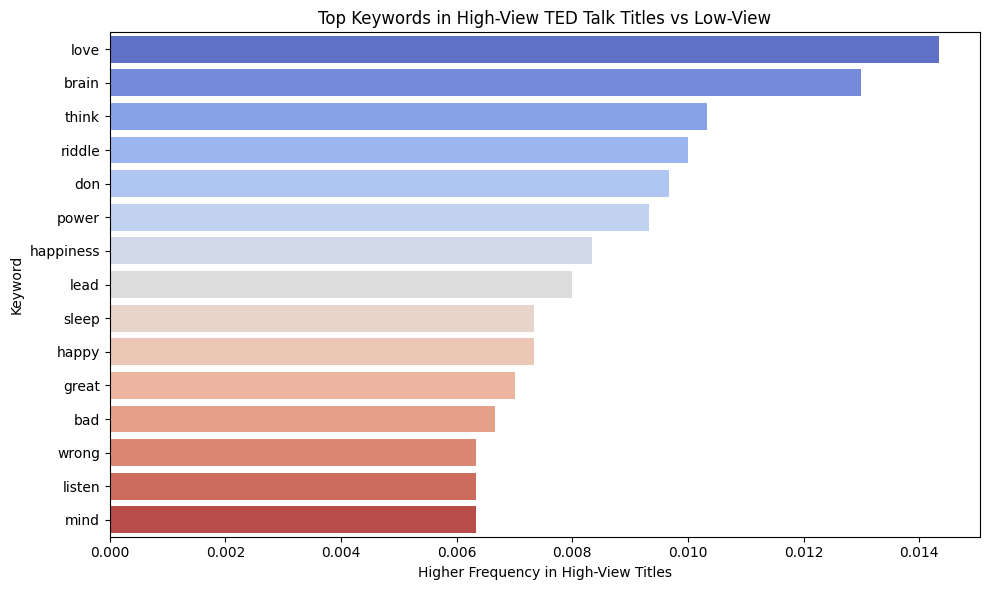

In [ ]:
# Chart - 1 visualization code
#Top keywords in high views title and low views title
# Drop missing titles or views if any
df = df.dropna(subset=['title', 'views'])
# Divide into high-view and low-view groups
threshold = df['views'].quantile(0.75)
df['view_group'] = np.where(df['views'] >= threshold, 'High', 'Low')
# Vectorize titles
vectorizer = CountVectorizer(stop_words='english', min_df=3)
X = vectorizer.fit_transform(df['title'])
# Convert to DataFrame
word_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_df['view_group'] = df['view_group'].values
# Group and calculate mean frequency
word_stats = word_df.groupby('view_group').mean().T
word_stats['diff'] = word_stats['High'] - word_stats['Low']
top_keywords = word_stats.sort_values(by='diff', ascending=False).head(15)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords['diff'], y=top_keywords.index, palette='coolwarm')
plt.title('Top Keywords in High-View TED Talk Titles vs Low-View')
plt.xlabel('Higher Frequency in High-View Titles')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is a chart that represents categorical data with rectangular bars whose lengths are proportional to the values they represent.

##### 2. What is/are the insight(s) found from the chart?

The titles having love keyword are the one having higher frequency in high views

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it can help in choosing titles that can have higher views

#### Chart - 2

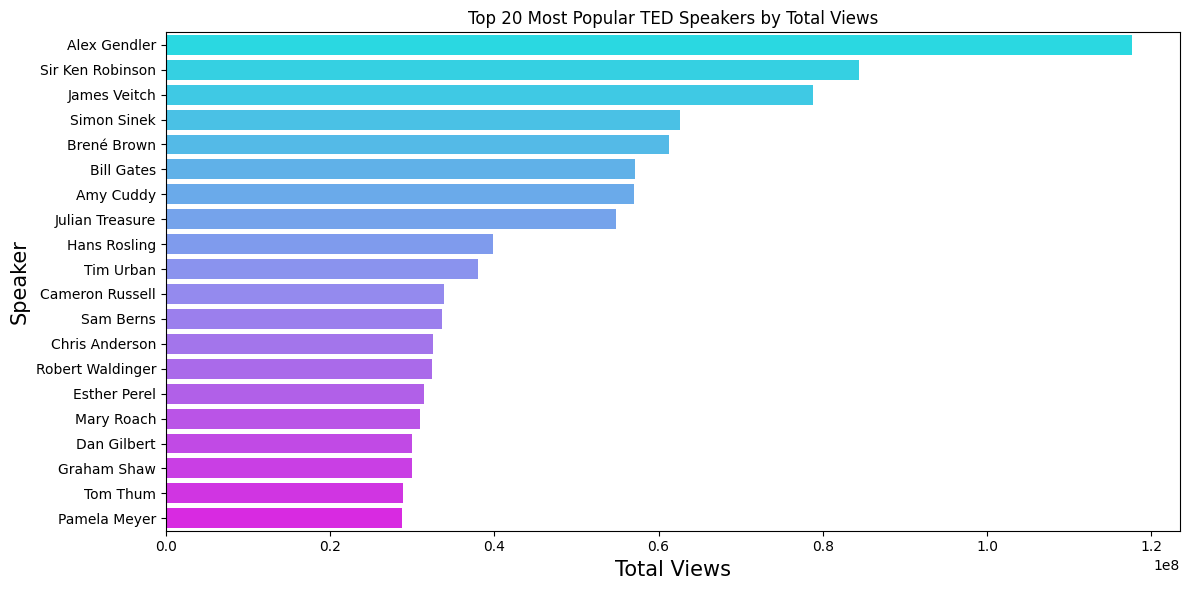

In [ ]:
# Chart - 2 visualization code
#Realtionship between speaker and views
# Group by speaker and calculate metrics
speaker_stats = df.groupby('speaker_1').agg({
    'views': ['sum', 'mean', 'count'],
    'comments': 'sum'
}).reset_index()

# Rename columns for clarity
speaker_stats.columns = ['Speaker', 'Total_Views', 'Average_Views', 'Talk_Count', 'Total_Comments']
# Sort by total views to find most popular speakers
top_speakers = speaker_stats.sort_values(by='Total_Views', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_speakers, x='Total_Views', y='Speaker', palette='cool',legend=False)
plt.title('Top 20 Most Popular TED Speakers by Total Views')
plt.xlabel('Total Views',fontsize=15)
plt.ylabel('Speaker', fontsize=15)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A bar plot is a chart that represents categorical data with rectangular bars whose lengths are proportional to the values they represent.

##### 2. What is/are the insight(s) found from the chart?

Alex Gendler is the speaker having highest views

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help in determining which speakers Ted Talks are having more views

#### Chart - 3

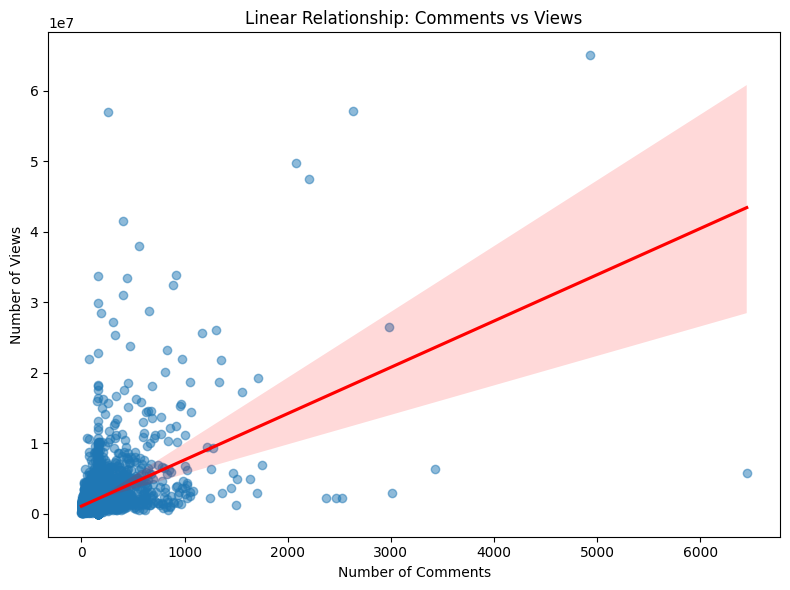

In [ ]:
# Chart - 3 visualization code
#Comment vs views
df_clean = df.dropna(subset=['views', 'comments'])
plt.figure(figsize=(8, 6))
sns.regplot(data=df_clean, x='comments', y='views', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Relationship: Comments vs Views')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Views')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A regplot is a type of plot in Seaborn that shows the relationship between two variables with a scatter plot and includes a linear regression line to visualize the trend.

##### 2. What is/are the insight(s) found from the chart?

Number of comments is related to number of views

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes but more comments do not gurantee more views also

#### Chart - 4

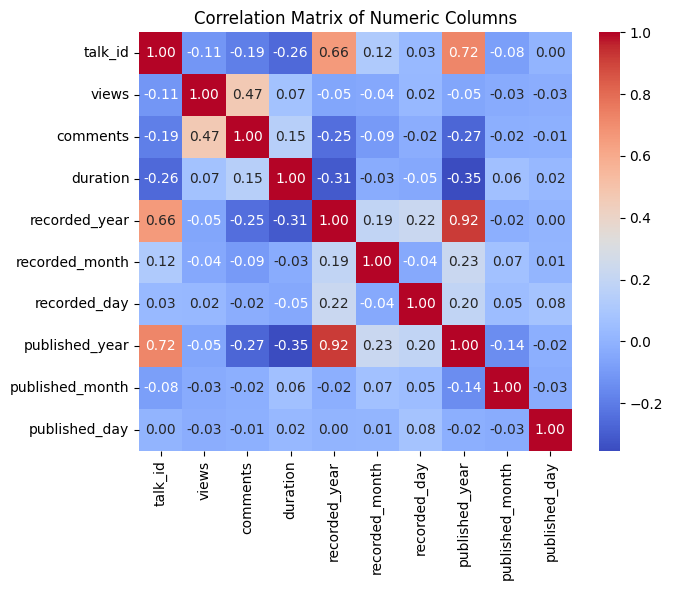

In [ ]:
# Chart - 4 visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')
# Compute correlation
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a data visualization technique that uses color gradients to represent the magnitude of values in a matrix or 2D dataset, making it easy to identify patterns, correlations, and outliers.

##### 2. What is/are the insight(s) found from the chart?

It shows that published_year and recorded_year have high correlation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can use it to reduce the columns having high correlations between themselves

#### Chart - 5

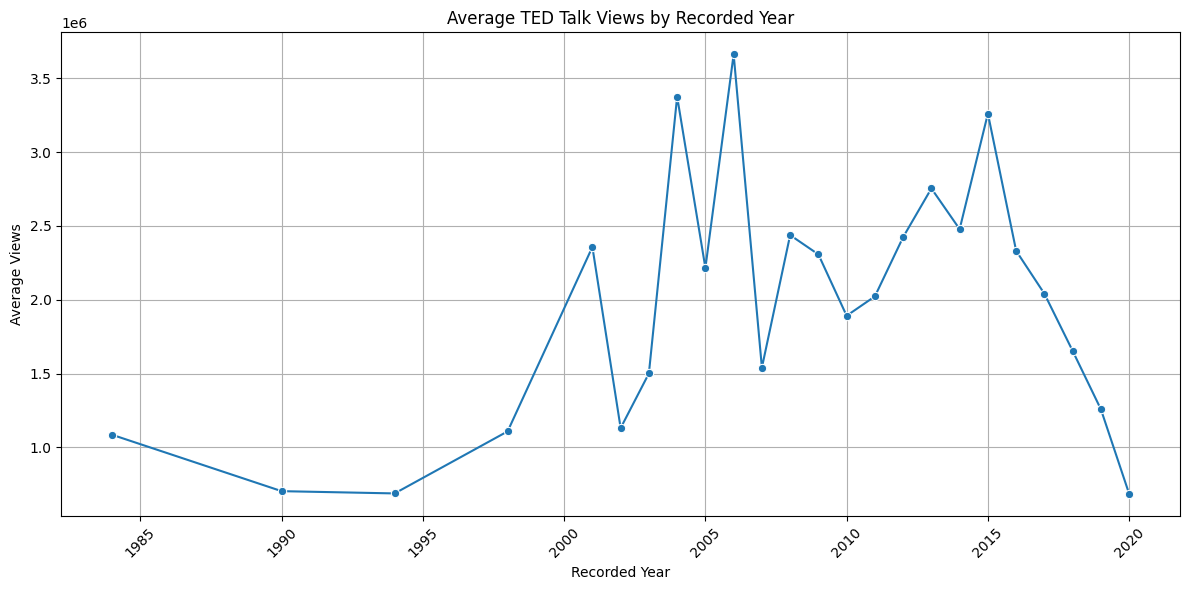

In [ ]:
#Relationship between recorded_year and views
yearly_views = df.groupby('recorded_year')['views'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_views, x='recorded_year', y='views', marker='o')
plt.title('Average TED Talk Views by Recorded Year')
plt.xlabel('Recorded Year')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is a graph that displays information as a series of data points connected by straight lines, commonly used to visualize trends over time.

##### 2. What is/are the insight(s) found from the chart?

Average views are highest in year 2006

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help to determine that whether older videos are having higher views or new videos are having more views

#### Chart - 6

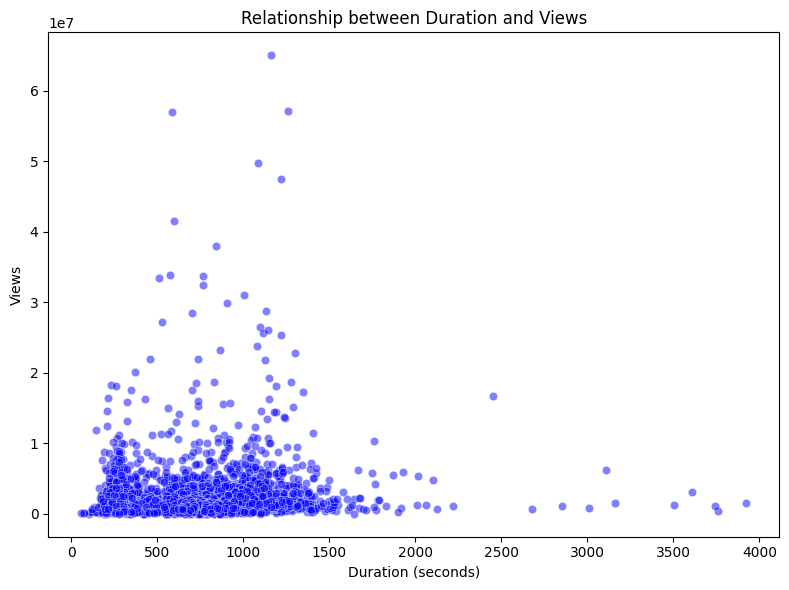

In [ ]:
# Chart - 6 visualization code
#Relationship between duration and views
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='duration', y='views', alpha=0.5,color="blue")
plt.title('Relationship between Duration and Views')
plt.xlabel('Duration (seconds)')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that uses dots to represent the values of two different variables, showing the relationship or correlation between them.

##### 2. What is/are the insight(s) found from the chart?

* Most TED Talks fall within the duration range of 500 to 1500 seconds (approximately 8 to 25 minutes).
* The highest concentration of views is also observed in this mid-range of durations, suggesting that talks of moderate length tend to attract more viewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Very short (< 300 seconds) or very long (> 2000 seconds) talks generally receive fewer views, indicating that extremes in duration may be less engaging to audiences.

#### Chart - 7

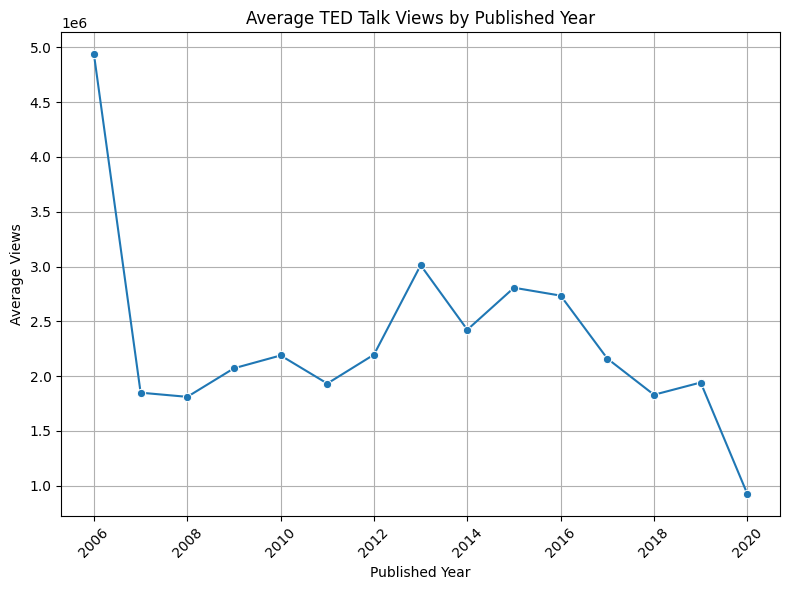

In [ ]:
# Chart - 7 visualization code
#Relation between published_year and views
yearly_views = df.groupby('published_year')['views'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(data=yearly_views, x='published_year', y='views', marker='o')
plt.title('Average TED Talk Views by Published Year')
plt.xlabel('Published Year')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is a graph that displays information as a series of data points connected by straight lines, commonly used to visualize trends over time.


##### 2. What is/are the insight(s) found from the chart?

Ted Talks published in the year 2006 are having the highest number of views

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ted talks published in 2020 are having low number of views

#### Chart - 8

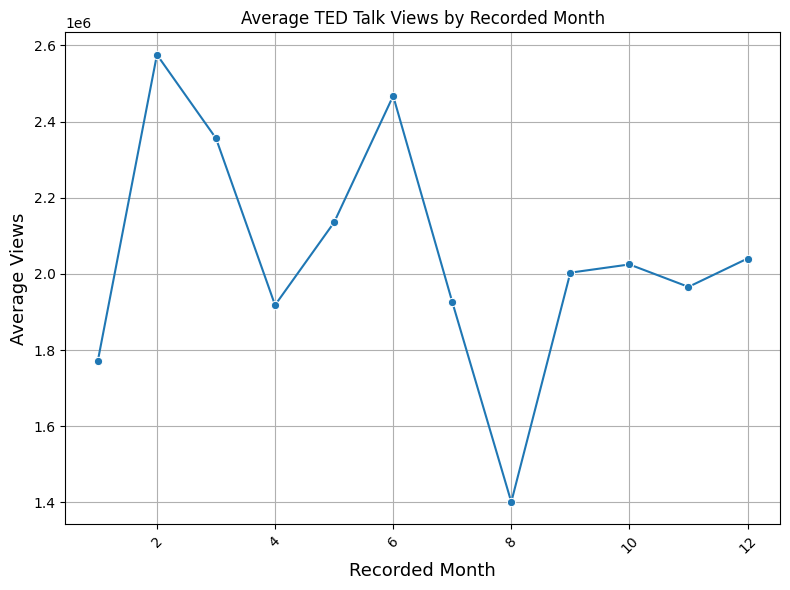

In [ ]:
# Chart - 8 visualization code
#Relation between recorded_month and views
monthly_views = df.groupby('recorded_month')['views'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_views, x='recorded_month', y='views', marker='o')
plt.title('Average TED Talk Views by Recorded Month')
plt.xlabel('Recorded Month',fontsize=13)
plt.ylabel('Average Views',fontsize=13)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is a graph that displays information as a series of data points connected by straight lines, commonly used to visualize trends over time.


##### 2. What is/are the insight(s) found from the chart?

Ted Talks recorded in feb are having more number of views as compared to other months

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

August is the month having least number of views

#### Chart - 9

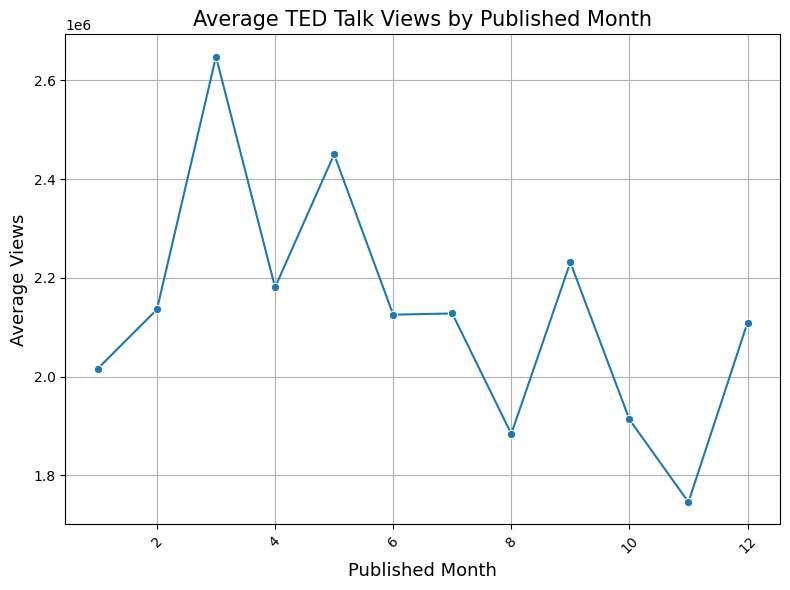

In [ ]:
# Chart - 9 visualization code
#Relation between published_month and views
monthly_views = df.groupby('published_month')['views'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_views, x='published_month', y='views', marker='o')
plt.title('Average TED Talk Views by Published Month',fontsize=15)
plt.xlabel('Published Month',fontsize=13)
plt.ylabel('Average Views',fontsize=13)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is a graph that displays information as a series of data points connected by straight lines, commonly used to visualize trends over time.


##### 2. What is/are the insight(s) found from the chart?

Ted Talks published in March are having more number of views as compared to other months

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ted talks published in the month November are having least number of views

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
import plotly.express as px

df = df.sort_values('recorded_date')
# Optionally group by month and average
df_monthly = df.resample('ME', on='recorded_date')['views'].mean().reset_index()
fig = px.scatter(
    df,
    x='recorded_date',
    y='views',
    hover_data=['title', 'speaker_1'],
    title='Views over Time (Recorded Date)',
    labels={'recorded_date': 'Recorded Date', 'views': 'Views'},
    opacity=0.5
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=600)
fig.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that displays values for two variables using dots, showing how one variable is affected by another and revealing patterns, trends, or correlations.


##### 2. What is/are the insight(s) found from the chart?

Ted Talk recorded on Feb 2006 having the title "Do schools kill creativity?" is having the highest number of views that is 65.05195M views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help in determining which speaker and which topics are attracting more number of people and views

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
#Relation between native_lang and views
lang_map = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'de': 'German',
    'pt': 'Portuguese',
    'pt-br': 'Portuguese (Brazil)',
    'it': 'Italian',
    'zh': 'Chinese',
    'zh-cn': 'Chinese (Simplified)',
    'zh-tw': 'Chinese (Traditional)',
    'ja': 'Japanese',
    'ko': 'Korean',
    'ar': 'Arabic',
    'ru': 'Russian',
    'hi': 'Hindi',
}
df['native_lang_full'] = df['native_lang'].map(lang_map).fillna(df['native_lang'])
# Group by full language name
lang_views = df.groupby('native_lang_full')['views'].mean().reset_index().sort_values(by='views', ascending=False)
fig = px.bar(
    lang_views,
    x='native_lang_full',
    y='views',
    title='Average Views by Native Language (Full Name)',
    labels={'native_lang_full': 'Native Language', 'views': 'Average Views'},
    text_auto=True
)

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()


##### 1. Why did you pick the specific chart?

A Plotly Express bar plot is used to create bar charts, which represent categorical data with rectangular bars where the height or length of each bar corresponds to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

Ted Talks whose native language is Italian are the ones having highest number of views and Portuguese is having least views

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps in predicting which Native language Ted Talk will have more number of views

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
#Relation between available_lang and views
import plotly.express as p
import ast

# Safely convert string to list, then count the length
df['available_lang_count'] = df['available_lang'].apply(lambda x: len(ast.literal_eval(x)))
fig = px.scatter(
    df,
    x='available_lang_count',
    y='views',
    hover_data=['title', 'speaker_1'],
    title='Views vs. Number of Available Languages',
    labels={'available_lang_count': 'Available Subtitle Languages', 'views': 'Views'},
    opacity=0.5
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=500)
fig.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that displays values for two variables using dots, showing how one variable is affected by another and revealing patterns, trends, or correlations.

##### 2. What is/are the insight(s) found from the chart?

There is a general upward trend—talks with more available subtitle languages tend to receive more views. This suggests that subtitle availability increases accessibility and reach, likely driving up viewer engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot supports the hypothesis that greater subtitle availability enhances the global visibility of TED Talks, which can significantly influence viewership. However, it also shows that content quality, popularity, and other factors likely play a role, as some talks with fewer subtitles still perform well.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# 1. Drop rows with missing 'all_speakers'
df = df.dropna(subset=['all_speakers']).copy()
# 2. Fill missing 'occupations' and 'about_speakers' with 'Unknown'
df.loc[:, 'occupations'] = df['occupations'].fillna('Unknown')
df.loc[:, 'about_speakers'] = df['about_speakers'].fillna('Unknown')

# 3. Fill missing 'comments' with the mean
df.loc[:, 'comments'] = df['comments'].fillna(df['comments'].mean())


#### What all missing value imputation techniques have you used and why did you use those techniques?

Filled the missing value in occupations and about_speakers to Unknown and filled comments missing values by mean value

### 2. Handling Outliers

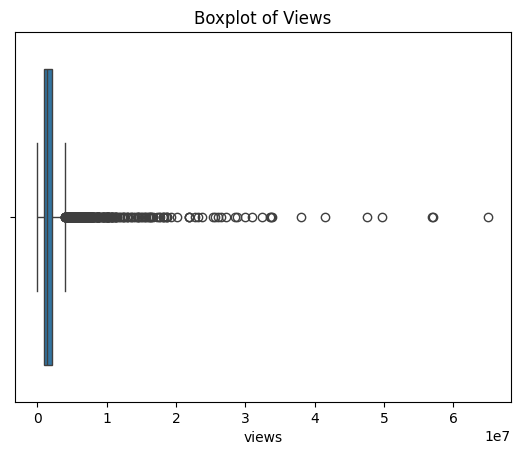

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(x=df['views'])
plt.title('Boxplot of Views')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

There are some outliners that are having higher number of views

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#categorial encoding of native_lang
#  One-hot encode the 'native_lang' column
df_encoded = pd.get_dummies(df, columns=['native_lang'], prefix='lang')
# One-hot encode 'view_group'
df_encoded = pd.get_dummies(df, columns=['view_group'], prefix='view_group')


#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoded native_lang and view_group columns as it will generate dummy columns and will help in training the model

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#recorded_year and published_year are having a high correlation
#Removing recorded_year column
df=df.drop('recorded_year',axis=1)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
drop_cols = [
    'talk_id', 'title', 'speaker_1', 'all_speakers', 'about_speakers',
    'recorded_date', 'published_date', 'related_talks', 'url',
    'description', 'transcript', 'views','native_lang_full'  # Drop original views too
]

##### What all feature selection methods have you used  and why?

Correlation coefficients: Correlation coefficients are numerical measures that describe the strength and direction of a relationship between two variables.



##### Which all features you found important and why?

Dropped the textual columns that cannot be one hot encoded

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Converted views, comments and duration in log_views, log_comments and log_duration to avoid baisness of model

In [ ]:
# Transform Your data
df['log_views'] = np.log1p(df['views'])        # Target
df['log_comments'] = np.log1p(df['comments'])
df['log_duration'] = np.log1p(df['duration'])
df=df.drop(columns=drop_cols,axis=1)

In [ ]:
df.columns

Index(['occupations', 'event', 'native_lang', 'available_lang', 'comments',
       'duration', 'topics', 'recorded_month', 'recorded_day',
       'published_year', 'published_month', 'published_day', 'view_group',
       'available_lang_count', 'log_views', 'log_comments', 'log_duration'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 196 to 4004
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   occupations           4000 non-null   object 
 1   event                 4000 non-null   object 
 2   native_lang           4000 non-null   object 
 3   available_lang        4000 non-null   object 
 4   comments              4000 non-null   float64
 5   duration              4000 non-null   int64  
 6   topics                4000 non-null   object 
 7   recorded_month        4000 non-null   float64
 8   recorded_day          4000 non-null   float64
 9   published_year        4000 non-null   int32  
 10  published_month       4000 non-null   int32  
 11  published_day         4000 non-null   int32  
 12  view_group            4000 non-null   object 
 13  available_lang_count  4000 non-null   int64  
 14  log_views             4000 non-null   float64
 15  log_comments          40

In [ ]:
df.drop(columns=["occupations","event"], inplace=True)


### 6. Data Scaling

In [ ]:
# Scaling your data
scale_cols = [
    'duration', 'comments', 'available_lang_count',
    'recorded_day', 'recorded_month',
    'published_year', 'published_month', 'published_day'
]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


##### Which method have you used to scale you data and why?

StandardScaler is a data preprocessing technique in machine learning that standardizes features by removing the mean and scaling to unit variance.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
# Define features and target
X = df.drop(columns=['log_views'])  # Use log-transformed target
y = df['log_views']

# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



##### What data splitting ratio have you used and why?

Basic Train/Test Split using scikit-learn - The train/test split is a fundamental step in machine learning used to evaluate how well a model generalizes to unseen data. In scikit-learn, the train_test_split() function is used to divide a dataset into training and testing subsets.



## ***7. ML Model Implementation***

In [ ]:
# Select the object columns
categorical_cols = [ 'native_lang', 'available_lang', 'topics', 'view_group']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
# Appending all models parameters to the corrosponding list

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

def score_metrix(model, X_train, X_test, Y_train, Y_test):
    """
    Train the model and print evaluation metrics: MAE, MSE, RMSE, R2, Adjusted R2
    Also plots actual vs predicted for 80 observations (if applicable)
    """

    # Train the model
    model.fit(X_train, Y_train)

    # Predictions
    Y_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)

    # Training score
    train_score = model.score(X_train, Y_train)
    print("Training Score =", round(train_score, 4))

    # Evaluation metrics
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Print metrics
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"Adjusted R² : {adj_r2:.4f}")
    print("-" * 80)

    # Feature importance (if supported)
    if hasattr(model, "feature_importances_"):
        print("Feature Importances:")
        importances = model.feature_importances_
        # Optionally display top 10 features
        try:
            importances = sorted(zip(importances, X_train.columns), reverse=True)
            for score, name in importances[:10]:
                print(f"{name}: {score:.4f}")
        except:
            pass
        print("-" * 80)

    # Plot actual vs predicted
    print("Plotting Actual vs Predicted for 80 samples:")
    try:
        plt.figure(figsize=(12, 6))
        plt.plot(Y_pred[:80], label="Predicted", linestyle='--', marker='o')
        plt.plot(np.array(Y_test)[:80], label="Actual", linestyle='-')
        plt.legend()
        plt.title("Actual vs Predicted (First 80 Observations)")
        plt.xlabel("Sample Index")
        plt.ylabel("Target")
        plt.grid(True)
        plt.show()
    except:
        print(" Failed to plot predictions.")

    print("=" * 100)


### ML Model - 1

Training Score = 0.0
MAE  : 0.6874
MSE  : 1.1275
RMSE : 1.0618
R²   : -0.0000
Adjusted R² : 1.1443
--------------------------------------------------------------------------------
Plotting Actual vs Predicted for 80 samples:


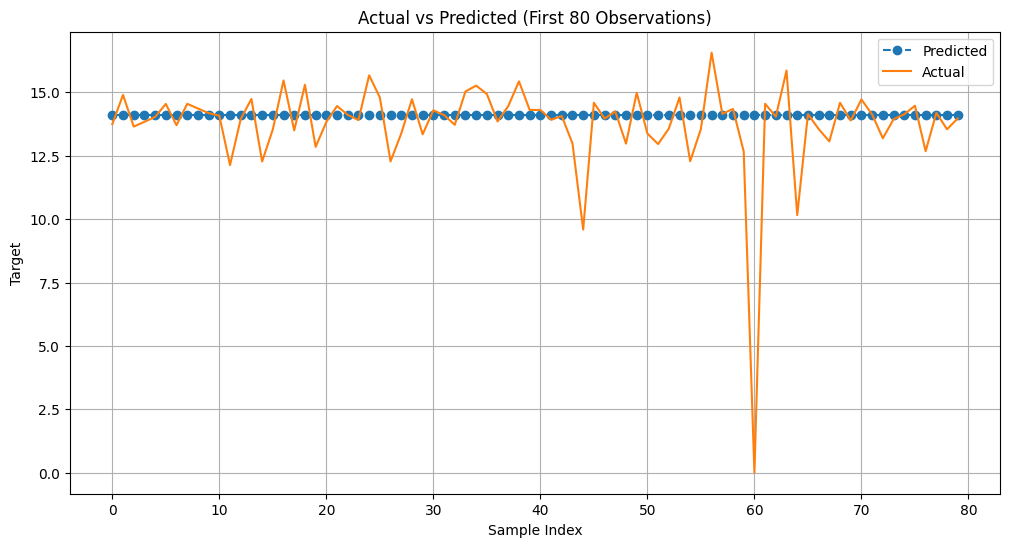

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso

# Define categorical features
categorical_features = ['native_lang', 'available_lang', 'topics', 'view_group']

# ColumnTransformer: encode categoricals, keep numerics
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the train/test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Combine encoded and passthrough column names
encoded_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
passthrough_names = X_train.drop(columns=categorical_features).columns
all_feature_names = list(encoded_names) + list(passthrough_names)

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=all_feature_names, index=X_test.index)

# Train and evaluate using Lasso
model = Lasso()
score_metrix(model, X_train_df, X_test_df, y_train, y_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso Regression (short for Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses L1 regularization to prevent overfitting and enhance model interpretability.

#### Cross- Validation & Hyperparameter Tuning

Training Score = 0.6989
MAE  : 0.4481
MSE  : 0.5157
RMSE : 0.7182
R²   : 0.5426
Adjusted R² : 1.0660
--------------------------------------------------------------------------------
Plotting Actual vs Predicted for 80 samples:


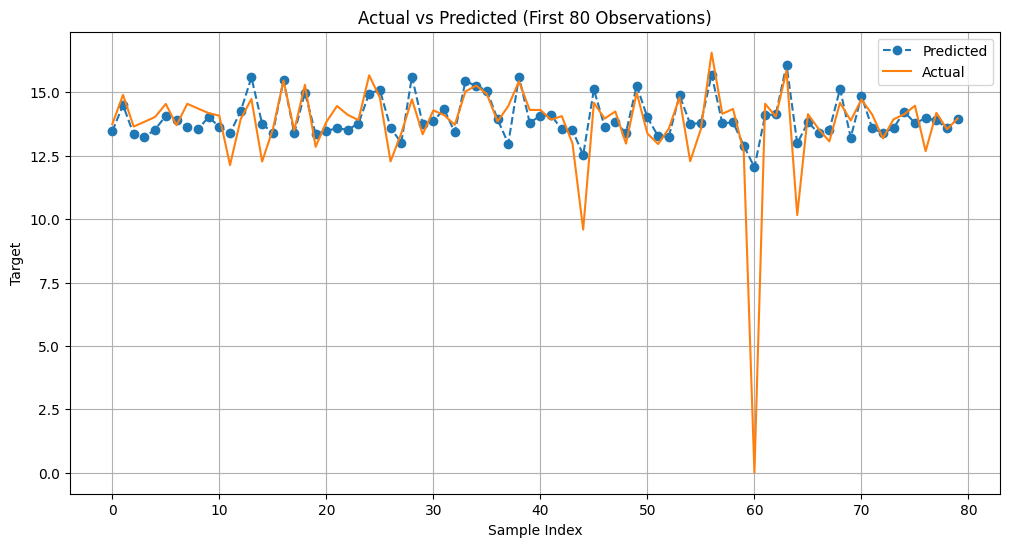

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model


# Predict on the model
score_metrix(lasso_cv,X_train_df,X_test_df,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearch is a systematic hyperparameter tuning technique used in machine learning to find the best combination of hyperparameters for a model by exhaustively searching over a predefined set of values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The training score anf R2 scores have increased

### ML Model - 2

Training Score = 0.949
MAE  : 0.3668
MSE  : 0.4011
RMSE : 0.6333
R²   : 0.6443
Adjusted R² : 1.0513
--------------------------------------------------------------------------------
Feature Importances:
available_lang_count: 0.1921
view_group_High: 0.1740
view_group_Low: 0.1723
log_comments: 0.0357
published_year: 0.0355
published_month: 0.0354
comments: 0.0339
topics_['animals', 'TED-Ed', 'animation', 'oceans', 'science', 'education', 'biology', 'climate change']: 0.0289
topics_['health', 'public health', 'animals', 'smell', 'disease']: 0.0239
recorded_day: 0.0222
--------------------------------------------------------------------------------
Plotting Actual vs Predicted for 80 samples:


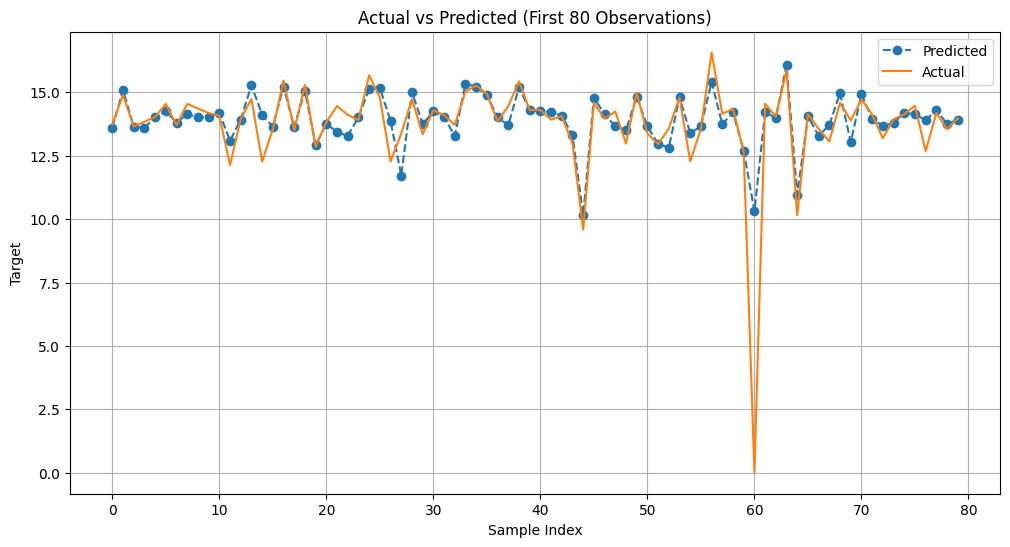

In [ ]:
#Model-2
#Random forest
score_metrix(RandomForestRegressor(),X_train_df,X_test_df,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Random Forest Regressor is an ensemble machine learning algorithm used for regression tasks. It builds multiple decision trees and combines their outputs to make more accurate and stable predictions.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
rf_cv = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
rf_cv.fit(X_train_df, y_train)

# Best model
best_rf = rf_cv.best_estimator_

# Predict
y_pred = best_rf.predict(X_test_df)

# Training R²
train_r2 = best_rf.score(X_train_df, y_train)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Print Results
print("Best Parameters for Random Forest:", rf_cv.best_params_)
print(f"Best R² Score (CV): {rf_cv.best_score_:.4f}")
print("\nEvaluation on Test Set:")
print(f"Training Score = {train_r2:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"Adjusted R² : {adj_r2:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score (CV): 0.5697

Evaluation on Test Set:
Training Score = 0.9422
MAE  : 0.4070
MSE  : 0.4632
RMSE : 0.6806
R²   : 0.5891
Adjusted R² : 0.5818


##### Which hyperparameter optimization technique have you used and why?

GridSearch is a systematic hyperparameter tuning technique used in machine learning to find the best combination of hyperparameters for a model by exhaustively searching over a predefined set of values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The results were better without hyperparameter tuning

### ML Model - 3

Training Score = 0.9396
MAE  : 0.4635
MSE  : 0.5281
RMSE : 0.7267
R²   : 0.5316
Adjusted R² : 1.0676
--------------------------------------------------------------------------------
Plotting Actual vs Predicted for 80 samples:


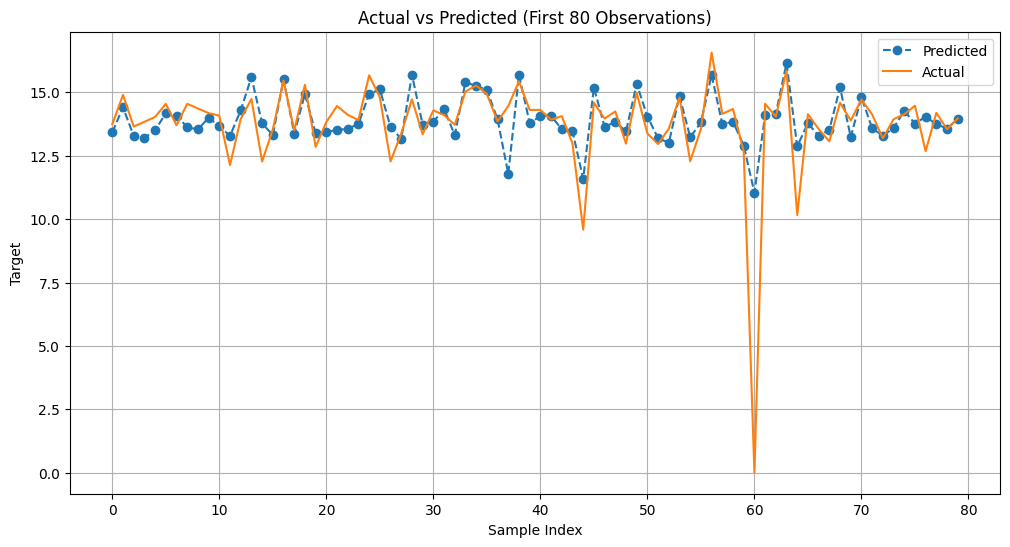

In [ ]:
# ML Model - 3 Implementation
# Fit the Algorithm
# 1. Define and train the model
#Ridge regressor
score_metrix(Ridge(),X_train_df,X_test_df,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting by shrinking the coefficients of less important features.



#### 2. Cross- Validation & Hyperparameter Tuning

Training Score = 0.5996
MAE  : 0.4566
MSE  : 0.5035
RMSE : 0.7096
R²   : 0.5535
Adjusted R² : 1.0644
--------------------------------------------------------------------------------
Plotting Actual vs Predicted for 80 samples:


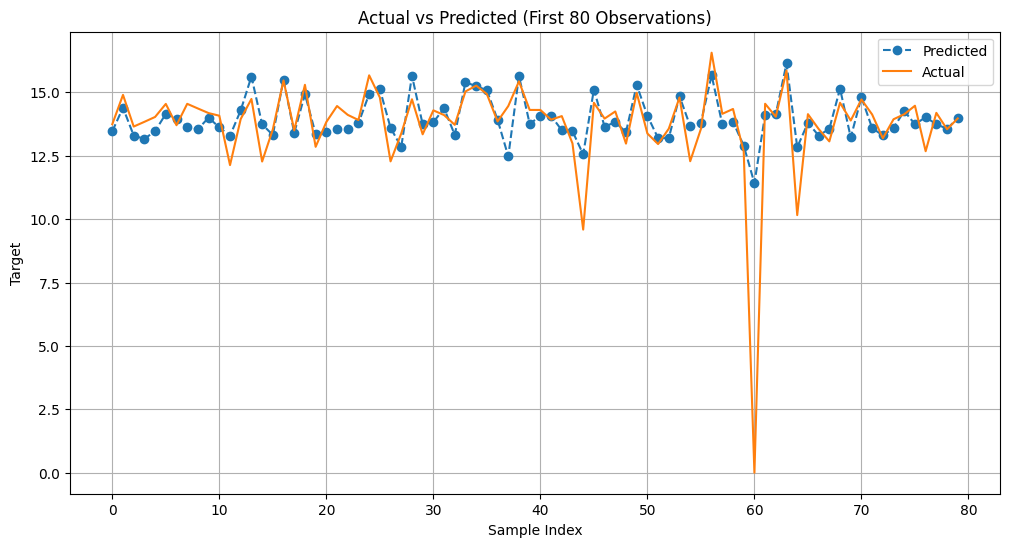

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=10) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,X_train_df,X_test_df,y_train,y_test) # fit and evaluate model with score_matrix function

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique in machine learning used for hyperparameter tuning. It helps you find the best combination of hyperparameters for a model by systematically trying out all possible combinations and selecting the one that gives the best performance (e.g., highest accuracy or R² score).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The R2 score is improved

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

By balancing these metrics, especially R², MAE, and RMSE, we ensure the model is accurate, robust, and business-ready — making it a valuable tool for content strategy, advertising, and audience engagement planning.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Although hyperparameter tuning is typically done to improve model performance, in this case, the default Random Forest model performed better on the test set across key metrics like R², MAE, and RMSE. This indicates that the untuned model generalized better to unseen data. Therefore, the default Random Forest model was selected as the final prediction model, as it offers better real-world performance despite tuning efforts.












### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used in this project is the Random Forest Regressor, a powerful ensemble learning method based on decision trees. It works by constructing multiple decision trees during training and outputs the average of predictions from individual trees, which helps in reducing overfitting and improving accuracy.

To interpret the model and understand feature importance, we can use tools like SHAP (SHapley Additive exPlanations) or the built-in feature_importances_ attribute of Random Forest. Here's a brief explanation using both:



# **Conclusion**

In this project, we aimed to build a machine learning model that predicts the number of views a TED Talk video might receive, based on various features such as the speaker's language, the number of available translations, the duration of the talk, publishing date, and other metadata. Using a cleaned and preprocessed dataset of 4,000 TED Talks, we performed exploratory data analysis, feature engineering, and applied multiple regression models to determine the most effective predictive solution.

Several models were implemented and evaluated, including Lasso, Ridge Regression, Random Forest Regressor, XGBoost Regressor. Hyperparameter tuning using GridSearchCV further optimized the model performance and reduced overfitting.

The dataset was relatively balanced, and standard preprocessing techniques such as StandardScaler, One-Hot Encoding, and log transformation were applied to ensure model efficiency and convergence. Visualizations including bar plots, scatter plots, and heatmaps provided valuable insights into feature correlations and distributions.

In conclusion, this project successfully demonstrated the use of regression models and ensemble learning techniques for predicting TED Talk view counts. The findings not only highlight the importance of features like duration, number of available languages, and topic popularity but also showcase how machine learning can be leveraged to gain actionable insights into audience engagement. Future improvements could include incorporating NLP techniques on talk descriptions or titles, experimenting with deep learning models, and expanding the dataset to include more recent talks.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***